In [2]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
def load_photos(directory):
    images = []
    labels1 = []
    labels2 = []
    for name in listdir(directory):
        filename = directory + '/' + name
        # convert image to gray
        #img = Image.open(filename).convert('L')
        #img.save(filename)
        # load an image from file
        image = load_img(filename, target_size=(128, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        labels1.append(round(float(name.split('_')[0].split('-')[0]), 1))
        labels2.append(round(float(name.split('_')[0].split('-')[1]), 1))
        images.append(image)
    return images, labels1, labels2

In [8]:
# load images from both train and test groups
directory = '../data/Patate_Pics/Training'
images, labels1, labels2 = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)
directory = '../data/Patate_Pics/Validation'
images_val, labels1_val, labels2_val = load_photos(directory)
nb_images_val = len(images_val)
print('Loaded Images and labels for validation: %d' % nb_images_val)

Loaded Images and labels for training: 896
Loaded Images and labels for validation: 150


In [9]:
#normalise datas
images = np.array(images)
images /= 255
images_val = np.array(images_val)
images_val /= 255

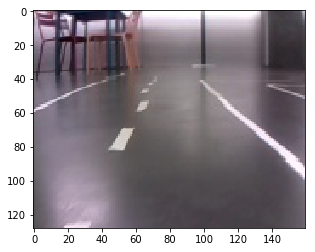

In [10]:
plt.imshow(images[1])

In [11]:
#convert to np.array
labels1 = np.array(labels1)
labels2 = np.array(labels2)
labels1_val = np.array(labels1_val)
labels2_val = np.array(labels2_val)

In [12]:
#convert datas to dummyvalues
labels1d = pd.get_dummies(labels1)
labels2d = pd.get_dummies(labels2)

In [13]:
labels1d.shape, labels2d.shape
labels1d, labels2d

(     0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
 0      1    0    0    0    0    0    0    0    0
 1      0    1    0    0    0    0    0    0    0
 2      0    1    0    0    0    0    0    0    0
 3      0    1    0    0    0    0    0    0    0
 4      0    1    0    0    0    0    0    0    0
 5      0    1    0    0    0    0    0    0    0
 6      0    1    0    0    0    0    0    0    0
 7      0    0    1    0    0    0    0    0    0
 8      0    0    1    0    0    0    0    0    0
 9      0    0    1    0    0    0    0    0    0
 10     0    0    1    0    0    0    0    0    0
 11     0    0    1    0    0    0    0    0    0
 12     0    0    1    0    0    0    0    0    0
 13     0    0    0    1    0    0    0    0    0
 14     0    0    0    1    0    0    0    0    0
 15     0    0    0    1    0    0    0    0    0
 16     0    0    0    1    0    0    0    0    0
 17     0    0    0    1    0    0    0    0    0
 18     0    0    0    1    0    0    0    0    0


In [14]:
#append empty columns
labels1d.insert(0, column='0.1', value=0, allow_duplicates=False)
labels2d.insert(0, column='0.2', value=0, allow_duplicates=False)
labels2d.insert(0, column='0.1', value=0, allow_duplicates=False)

labels1d, labels2d

(     0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
 0      0    1    0    0    0    0    0    0    0    0
 1      0    0    1    0    0    0    0    0    0    0
 2      0    0    1    0    0    0    0    0    0    0
 3      0    0    1    0    0    0    0    0    0    0
 4      0    0    1    0    0    0    0    0    0    0
 5      0    0    1    0    0    0    0    0    0    0
 6      0    0    1    0    0    0    0    0    0    0
 7      0    0    0    1    0    0    0    0    0    0
 8      0    0    0    1    0    0    0    0    0    0
 9      0    0    0    1    0    0    0    0    0    0
 10     0    0    0    1    0    0    0    0    0    0
 11     0    0    0    1    0    0    0    0    0    0
 12     0    0    0    1    0    0    0    0    0    0
 13     0    0    0    0    1    0    0    0    0    0
 14     0    0    0    0    1    0    0    0    0    0
 15     0    0    0    0    1    0    0    0    0    0
 16     0    0    0    0    1    0    0    0    0    0
 17     0 

In [15]:
#convert to np.array again
labels1d = np.array(labels1d)
labels2d = np.array(labels2d)

In [16]:
#check if OK
labels1[1], labels1d[1]

(0.29999999999999999, array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [17]:
from keras.models import Model
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers

In [18]:
K.clear_session()

img_in = Input(shape=(128, 160, 3), name='img_in')

x = img_in

x = Convolution2D(24, (5,5), strides=(2,2), activation='relu')(x)       # 24 features, 5 pixel x 5 pixel kernel (convolution, feauture) window, 2wx2h stride, relu activation
x = Convolution2D(32, (5,5), strides=(2,2), activation='relu')(x)       # 32 features, 5px5p kernel window, 2wx2h stride, relu activatiion
x = Convolution2D(64, (5,5), strides=(2,2), activation='relu')(x)       # 64 features, 5px5p kernal window, 2wx2h stride, relu
x = Convolution2D(64, (3,3), strides=(2,2), activation='relu')(x)       # 64 features, 3px3p kernal window, 2wx2h stride, relu
x = Convolution2D(64, (3,3), strides=(1,1), activation='relu')(x)       # 64 features, 3px3p kernal window, 1wx1h stride, relu

# Possibly add MaxPooling (will make it less sensitive to position in image).  Camera angle fixed, so may not to be needed

x = Flatten(name='flattened')(x)                                        # Flatten to 1D (Fully connected)
x = Dense(100, activation='relu')(x)                                    # Classify the data into 100 features, make all negatives 0
x = Dropout(.1)(x)                                                      # Randomly drop out (turn off) 10% of the neurons (Prevent overfitting)
x = Dense(50, activation='relu')(x)                                     # Classify the data into 50 features, make all negatives 0
x = Dropout(.1)(x)                                                      # Randomly drop out 10% of the neurons (Prevent overfitting)

#categorical output
out1 = Dense(10, activation='softmax')(x)
out2 = Dense(10, activation='softmax')(x)

model = Model(inputs=[img_in], outputs=[out1, out2])
model.compile(loss=['categorical_crossentropy', 'categorical_crossentropy'], optimizer='adadelta', metrics=['accuracy'])

In [19]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
img_in (InputLayer)              (None, 128, 160, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 62, 78, 24)    1824        img_in[0][0]                     
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 29, 37, 32)    19232       conv2d_1[0][0]                   
____________________________________________________________________________________________________
conv2d_3 (Conv2D)                (None, 13, 17, 64)    51264       conv2d_2[0][0]                   
___________________________________________________________________________________________

In [20]:
h = model.fit(images, [labels1d, labels2d], batch_size=1, epochs=50, verbose=1)

Epoch 1/50
896/896 [==============================] - 25s - loss: 3.5721 - dense_3_loss: 1.6971 - dense_4_loss: 1.8750 - dense_3_acc: 0.2946 - dense_4_acc: 0.2701    
Epoch 2/50
896/896 [==============================] - 22s - loss: 3.3622 - dense_3_loss: 1.6058 - dense_4_loss: 1.7564 - dense_3_acc: 0.3125 - dense_4_acc: 0.2868    
Epoch 3/50
896/896 [==============================] - 21s - loss: 3.3562 - dense_3_loss: 1.6032 - dense_4_loss: 1.7530 - dense_3_acc: 0.3292 - dense_4_acc: 0.2734    
Epoch 4/50
896/896 [==============================] - 35s - loss: 3.3356 - dense_3_loss: 1.5964 - dense_4_loss: 1.7392 - dense_3_acc: 0.3147 - dense_4_acc: 0.2868    
Epoch 5/50
896/896 [==============================] - 40s - loss: 3.3297 - dense_3_loss: 1.5900 - dense_4_loss: 1.7397 - dense_3_acc: 0.3225 - dense_4_acc: 0.2801    
Epoch 6/50
896/896 [==============================] - 40s - loss: 3.3221 - dense_3_loss: 1.5920 - dense_4_loss: 1.7300 - dense_3_acc: 0.3382 - dense_4_acc: 0.2879   

896/896 [==============================] - 23s - loss: 0.2771 - dense_3_loss: 0.1240 - dense_4_loss: 0.1531 - dense_3_acc: 0.9554 - dense_4_acc: 0.9587    
Epoch 49/50
896/896 [==============================] - 14s - loss: 0.2558 - dense_3_loss: 0.1413 - dense_4_loss: 0.1145 - dense_3_acc: 0.9654 - dense_4_acc: 0.9665    
Epoch 50/50
896/896 [==============================] - 14s - loss: 0.2179 - dense_3_loss: 0.1085 - dense_4_loss: 0.1095 - dense_3_acc: 0.9621 - dense_4_acc: 0.9576    


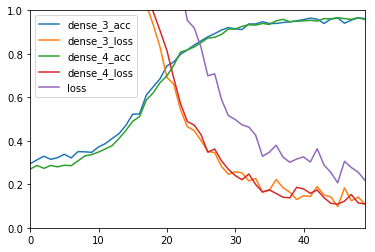

In [21]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

In [22]:
# Get predictions
all_preds = model.predict(images_val)

# Check predictions
idx1 = np.argmax(all_preds[0], axis=1)
idx2 = np.argmax(all_preds[1], axis=1)

i = 0
for value1 in idx1:
    idx1[i] = value1 + 1
    i = i + 1
i = 0
for value2 in idx2:
    idx2[i] = value2 + 1
    i = i + 1

idx1, idx2, labels2_val, labels1_val

(array([8, 9, 9, 7, 8, 9, 5, 7, 6, 8, 6, 7, 7, 5, 8, 7, 6, 5, 5, 7, 5, 8, 8,
        7, 6, 8, 8, 9, 7, 6, 8, 8, 7, 8, 7, 7, 7, 6, 5, 8, 7, 6, 7, 7, 8, 8,
        7, 7, 8, 7, 8, 8, 7, 7, 7, 8, 8, 9, 7, 7, 8, 6, 6, 6, 8, 8, 8, 6, 6,
        7, 8, 7, 7, 8, 7, 7, 7, 8, 6, 7, 5, 8, 8, 9, 6, 7, 5, 8, 8, 7, 7, 7,
        8, 7, 7, 8, 7, 7, 8, 6, 7, 8, 8, 7, 6, 8, 8, 6, 9, 8, 8, 8, 7, 7, 7,
        9, 7, 8, 8, 7, 7, 8, 8, 8, 8, 7, 5, 8, 9, 7, 8, 8, 8, 7, 9, 7, 7, 8,
        6, 8, 8, 8, 7, 7, 8, 8, 9, 7, 9, 8], dtype=int64),
 array([ 9,  7,  9,  6,  5,  8,  4, 10,  7,  8,  6,  9,  6,  4,  9,  7,  6,
         7,  5,  7,  9,  8,  8, 10,  7,  7,  8,  5, 10,  6,  8,  8,  5,  8,
         8,  8,  7,  7,  5,  8,  5,  5,  6,  7,  8,  8,  8,  9,  5,  5,  8,
         9,  7,  9,  8,  8,  8,  7,  5,  8,  8,  8,  5,  5,  9,  9,  8,  5,
         6,  6,  8,  7,  8,  8,  7,  7,  7,  9,  7,  9,  4,  9,  9,  8,  6,
         5,  4,  6,  5,  7,  7,  5,  8,  5,  9,  9,  6,  7,  8,  7,  7,  9,
         6,  7,  6,  8,

In [23]:
import math
i = 0
res = 0
for value in idx1:
    if value > idx2[i] and labels1_val[i] < labels2_val[i]:
        res = res + 1
    elif value < idx2[i] and labels1_val[i] > labels2_val[i]:
        res = res + 1
    i = i + 1
res/i

0.11333333333333333

In [24]:
model.save('model-2x10.h5')

In [ ]:
from keras.models import load_model
model = load_model('test_model.h5')